In [1]:
import os
import torch
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

from main_monodepth_pytorch import Model
%reload_ext autoreload
%autoreload 2

## Train

Check if CUDA is available

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.empty_cache()

In [ ]:
# dict_parameters = edict({'data_dir':'data/kitti/train/',
#                          'val_data_dir':'data/kitti/val/',
#                          'model_path':'data/models/monodepth_resnet18_001.pth',
#                          'output_directory':'data/output/',
#                          'input_height':256,
#                          'input_width':512,
#                          'model':'resnet18_md',
#                          'pretrained':True,
#                          'mode':'train',
#                          'epochs':200,
#                          'learning_rate':1e-4,
#                          'batch_size': 8,
#                          'adjust_lr':True,
#                          'device':'cuda:0',
#                          'do_augmentation':True,
#                          'augment_parameters':[0.8, 1.2, 0.5, 2.0, 0.8, 1.2],
#                          'print_images':False,
#                          'print_weights':False,
#                          'input_channels': 3,
#                          'num_workers': 8,
#                          'use_multiple_gpu': False})

In [ ]:
# model = Model(dict_parameters)
#model.load('data/models/monodepth_resnet18_001_last.pth')

In [ ]:
# model.train()

## Test the model

In [8]:
dict_parameters_test = edict({'data_dir':'data/test',
                              'model_path':'data/models/monodepth_resnet18_001_cpt.pth',
                              'output_directory':'data/output/',
                              'input_height':256,
                              'input_width':512,
                              'model':'resnet18_md',
                              'pretrained':True,
                              'mode':'test',
                              'device':'cuda:0',
                              'input_channels':3,
                              'num_workers':8,
                              'use_multiple_gpu':False})
model_test = Model(dict_parameters_test)

Use a dataset with 1 images


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [9]:
model_test.test()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Finished Testing


In [10]:
disp = np.load('data/output/disparities_pp.npy')  # Or disparities.npy for output without post-processing
disp.shape

(1, 256, 512)

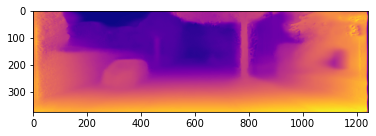

In [11]:
disp_to_img = skimage.transform.resize(disp[0].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img, cmap='plasma')

Save a color image

In [12]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_test_output.png'), disp_to_img, cmap='plasma')

Save all test images

In [13]:
for i in range(disp.shape[0]):
    disp_to_img = skimage.transform.resize(disp[i].squeeze(), [375, 1242], mode='constant')
    plt.imsave(os.path.join(dict_parameters_test.output_directory,
               'pred_'+str(i)+'.png'), disp_to_img, cmap='plasma')

Save a grayscale image

In [14]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_gray.png'), disp_to_img, cmap='gray')